In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [15]:
epoch_num = 20

In [19]:
def plot_learning_curves(history):
    df = pd.DataFrame(history.history)
    df.plot(figsize=(8, 5))
    plt.grid(True)
    plt.xlim(0, epoch_num-1)
    plt.ylim(0, 3)
    plt.show()

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
 
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train_all.shape, y_train_all.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)


In [4]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#  x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#relu: y = max(0, x)
#softmax: 将向量变成概率分布 x = [x1, x2, x3],
#         y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y -> index, y -> one_hot ->[]
# 如果y已经是一个向量了：使用categorical_crossentropy（）
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [17]:
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train_scaled,
                    y_train,
                    epochs=epoch_num,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9676 - accuracy: 0.5834 - val_loss: 0.8943 - val_accuracy: 0.6116
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8790 - accuracy: 0.6232 - val_loss: 0.8078 - val_accuracy: 0.6758
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8233 - accuracy: 0.6573 - val_loss: 0.7652 - val_accuracy: 0.6860
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7769 - accuracy: 0.6803 - val_loss: 0.7842 - val_accuracy: 0.6832
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7339 - accuracy: 0.6995 - val_loss: 0.6913 - val_accuracy: 0.7056
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6962 - accuracy: 0.7215 - val_loss: 0.6680 - val_accuracy: 0.7302
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6750 - accuracy: 0.7411 - val_loss: 0.6262 - val_accuracy:

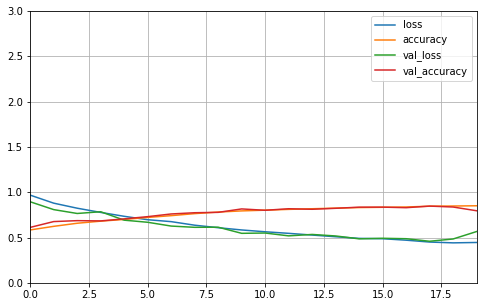

In [20]:
plot_learning_curves(history)

# 1. 参数众多，训练不充分【初期】，目标函数不发生变化
# 2. 梯度消失【导数】 ，一般发生在深度神经网络里-》链式法则【复合函数求导g(f(X))】

In [14]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0009 - accuracy: 0.5866


[1.0009480714797974, 0.5866000056266785]